In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.reset_orig()

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

# Generate data

In [98]:
n = 10000
x = np.linspace(0, 100, n)

y = x * (1 + np.sin(x / 10) ** 2)
y_noisy = y + x * np.random.randn(n) / 4

df = pd.DataFrame({"x": x, "y": y_noisy})
df.to_csv("histogram.csv")

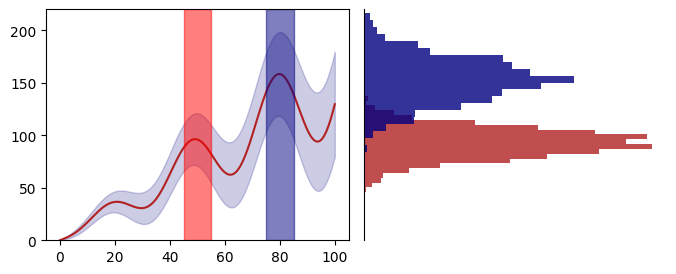

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

ax = axs[0]

ax.plot(x, y, color="firebrick", zorder=1)
ax.fill_between(x, y - x / 2, y + x / 2, color="navy", alpha=0.2, zorder=0)

ax.axvspan(45, 55, alpha=0.5, color="red")
ax.axvspan(75, 85, alpha=0.5, color="navy")
ax.set_ylim(0, 220)

ax = axs[1]
dist1 = y_noisy[np.where((x >= 45) & (x <= 55))]
dist2 = y_noisy[np.where((x >= 75) & (x <= 85))]

ax.hist(
    dist1, bins=20, color="firebrick", orientation="horizontal", alpha=0.8, density=True
)
ax.hist(dist2, bins=20, color="navy", orientation="horizontal", alpha=0.8, density=True)
ax.set_ylim(0, 220)

ax.spines[["right", "top", "bottom"]].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

fig.subplots_adjust(wspace=0.05)